In [446]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,jaccard_score,fbeta_score,classification_report

In [447]:
#import data
df=pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [448]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [449]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [450]:
print('count of null datas:')
print(df.isnull().sum())

count of null datas:
Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


In [451]:
#convert data to array
x=df[['Age','Gender','Heart rate','Systolic blood pressure','Diastolic blood pressure','Blood sugar','CK-MB','Troponin']]
x=np.asanyarray(x)
y=df[['Result']]
y=np.asanyarray(y)
print('show count of infinite datas:',np.isinf(x).sum())
print('show count of nan datas:',np.isnan(x).sum())

show count of infinite datas: 0
show count of nan datas: 0


In [452]:
#encode result of data
y=y.ravel()
y=LabelEncoder().fit(['negative','positive']).transform(y)
print('result encoded:',y)

result encoded: [0 1 0 ... 1 1 1]


In [453]:
#split data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [454]:
#find best parameter for model with gridsearch
param_grid={'criterion':['gini','entropy','log_loss'],'max_depth':range(2,10),'max_leaf_nodes':range(2,10),'max_features':range(2,10)}
model=DecisionTreeClassifier()
grid=GridSearchCV(model,param_grid,cv=4,scoring='accuracy',n_jobs=-1)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 10),
                         'max_features': range(2, 10),
                         'max_leaf_nodes': range(2, 10)},
             scoring='accuracy')

In [455]:
#show best parameters
print('best criterion:',grid.best_params_['criterion'])
print('max_depth:',grid.best_params_['max_depth'])
print('max_leaf:',grid.best_params_['max_leaf_nodes'])
print('max_feature:',grid.best_params_['max_features'])
print('mean_accuracy:',grid.best_score_)

best criterion: gini
max_depth: 5
max_leaf: 6
max_feature: 7
mean_accuracy: 0.9943181818181819


In [461]:
#create model with best parameters
model=DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=6,max_features=7,random_state=42)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, max_features=7, max_leaf_nodes=6,
                       random_state=42)

In [462]:
#show model evaluation
ypredict=model.predict(xtest)
print(classification_report(ytest,ypredict))
print('fbeta_score:',fbeta_score(ytest,ypredict,beta=2))
print('jaccard_score:',jaccard_score(ytest,ypredict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

fbeta_score: 0.9865196078431373
jaccard_score: 0.9698795180722891


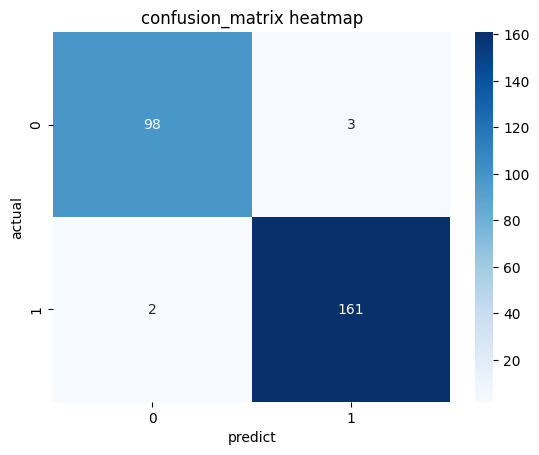

In [463]:
#show confusion matrix
matrics=confusion_matrix(ytest,ypredict)
sns.heatmap(pd.DataFrame(matrics),annot=True,fmt='d',cmap='Blues')
plt.title('confusion_matrix heatmap')
plt.xlabel('predict')
plt.ylabel('actual')
plt.show()

In [464]:
#show decision tree with text
names=['Age','Gender','Heart rate','Systolic blood pressure','Diastolic blood pressure','Blood sugar','CK-MB','Troponin']
print(export_text(model,feature_names=names,class_names=['negative','positive']))

|--- Troponin <= 0.01
|   |--- CK-MB <= 6.22
|   |   |--- CK-MB <= 4.88
|   |   |   |--- class: negative
|   |   |--- CK-MB >  4.88
|   |   |   |--- Gender <= 0.50
|   |   |   |   |--- class: positive
|   |   |   |--- Gender >  0.50
|   |   |   |   |--- class: negative
|   |--- CK-MB >  6.22
|   |   |--- class: positive
|--- Troponin >  0.01
|   |--- Systolic blood pressure <= 59.00
|   |   |--- class: negative
|   |--- Systolic blood pressure >  59.00
|   |   |--- class: positive



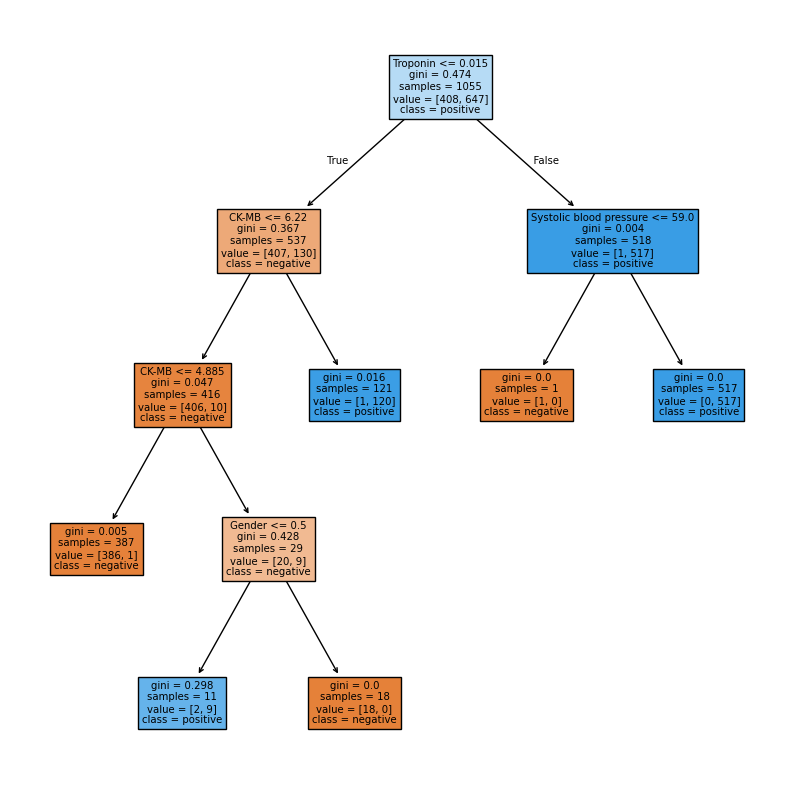

In [467]:
#show decision tree with plt
fig=plt.figure(figsize=(10,10))
tree=plot_tree(model,feature_names=names,class_names=['negative','positive'],filled=True)
plt.show()